# For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

## 1. Start by creating a new Notebook for this assignment.

## 2. Use the Notebook to build the code to scrape the following Wikipedia page.    
       
    link: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
    In order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe 

## 3. To create the above dataframe:

    The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
    Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    More than one neighborhood can exist in one postal code area. 
    For example, in the table on the Wikipedia page, you will notice that
    M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. 
    These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
    If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
    Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
    In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

## 4. Submit a link to your Notebook on your Github repository.

In [3]:
!conda install -c conda-forge beautifulsoup4 --yes

!conda install -c conda-forge geopy --yes

!conda install -c conda-forge folium=0.5.0 --yes
from bs4 import BeautifulSoup
import requests

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.0       |   py36h9f0ad1d_0         160 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    soupsieve-1.9.4            |   py36h9f0ad1d_1          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     conda-forge/linux-64::beautifulsoup4-4.9.0-py36h9f0ad1d_0
  soupsieve          conda-forge/linux-64::soupsieve-1.9.4-py36h9f0ad1d_1

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1

#### 1. Start by creating a new Notebook for this assignment.

In [4]:
# librarys to inmport  
import numpy as np 

import pandas as pd 

#### 2. Use the Notebook to build the code to scrape the following Wikipedia page.    

In [5]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source, 'html.parser')
tablePSOC=soup.find('div', class_='mw-parser-output').table.tbody
rows=tablePSOC.findAll("tr")

col0=[]
col1=[]
col2=[]
for row in rows:
    df_row = []
    for cell in row.findAll(["td", "th"]):
        df_row.append(cell.text.rstrip('\n'))
    col0.append(df_row[0])
    col1.append(df_row[1])
    col2.append(df_row[2])
table = [('PostalCode', col0),('Borough', col1),('Neighborhood', col2)]
df = pd.DataFrame.from_dict(dict(table))
df.head()

,PostalCode,Borough,Neighborhood
0,Postal code,Borough,Neighborhood
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


**Dataframe Analysis before any transformation**

In [6]:
print("total of record after web scrape ",df.shape)
for column in df.columns.values.tolist():
    print("Column Name:\"",column,"\" Groups:")
    print(df[column].value_counts(),"")
    print("")    

total of record after web scrape  (181, 3)
Column Name:" PostalCode " Groups:
M1M    1
M4P    1
M8Z    1
M5B    1
M7Y    1
      ..
M5K    1
M5X    1
M5P    1
M9T    1
M9A    1
Name: PostalCode, Length: 181, dtype: int64 

Column Name:" Borough " Groups:
Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East Toronto         5
East York            5
Mississauga          1
Borough              1
Name: Borough, dtype: int64 

Column Name:" Neighborhood " Groups:
                                             77
Downsview                                     4
Don Mills                                     2
Willowdale                                    2
Willowdale / Newtonbrook                      1
                                             ..
Hillcrest Village                             1
Rosedale                                      1
Fairview / Henry F

#### Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [7]:
df=df.drop(0,axis=0)
# reaplacing "Not assigned" with "NaN"
df.replace("Not assigned", np.nan, inplace = True)

# simply drop whole row with "Not assigned" in "Borough" column
df.dropna(subset=["Borough"], axis=0, inplace=True)

# reset index, because we droped rows
df.reset_index(drop=True, inplace=True)

# Some of the requirements 3 are not necessary because the data in Wikipedia was updated according the request

*Never the less , you can see the code for the requirements below*

#### Grouping neighborhood that exists in one postal code area

In [8]:
dfGrouped = df.groupby(['PostalCode','Borough'], as_index=False).agg(lambda x: ','.join(x))
dfGrouped.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


#### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [9]:
dfGrouped['Neighborhood'].replace("Not assigned",dfGrouped["Borough"], inplace = True)
dfGrouped.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


**Dataframe Analysis after transformations**

In [10]:
print("total of record after web scrape ",dfGrouped.shape)
for column in df.columns.values.tolist():
    print("Column Name:\"",column,"\" Groups:")
    print(df[column].value_counts(),"")
    print("")    

total of record after web scrape  (103, 3)
Column Name:" PostalCode " Groups:
M4G    1
M4M    1
M1L    1
M1W    1
M1K    1
      ..
M2L    1
M6H    1
M6N    1
M3L    1
M9A    1
Name: PostalCode, Length: 103, dtype: int64 

Column Name:" Borough " Groups:
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64 

Column Name:" Neighborhood " Groups:
Downsview                                                           4
Don Mills                                                           2
Willowdale                                                          2
Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood    1
Berczy Park                                                         1
                                                                   ..
St. James Town              

In [11]:
dfToronto=dfGrouped # from now one the data frame to be use is "dfToronto"
print("total of records after transformation: ",dfToronto.shape)



total of records after transformation:  (103, 3)


# Second Part of "Segmenting and Clustering Neighborhoods in Toronto"
* Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to   utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

* In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of  each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

# Now we get the latitude and Longitude for Toronto from a CSV File 

In [12]:
df_lat_long = pd.read_csv('http://cocl.us/Geospatial_data')

df_lat_long.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


# Adjusting postal code column names for merging with Toronto wikipedia data 

In [13]:

df_lat_long=df_lat_long.rename(columns={"Postal Code": "PC"})
df_lat_long.head()

,PC,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Use the Geocoder package or the csv file to create the following dataframe:

In [14]:
dfToronto=dfToronto.merge(df_lat_long, left_on='PostalCode', right_on='PC')
dfToronto.head()

,PostalCode,Borough,Neighborhood,PC,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,M1B,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,M1C,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476


# Third Part of "Segmenting and Clustering Neighborhoods in Toronto"

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

* to add enough Markdown cells to explain what you decided to do and to report any observations you make.
* to generate maps to visualize your neighborhoods and how they cluster together.

In [15]:
#importsfor third part 


import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


Solving environment: done

# All requested packages already installed.



In [16]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
# due to number of features to be analized we need to set unlimited the number coloumns
 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
# create latitude and longitude for Toronto

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ',address,' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  Toronto, Ontario  are 43.6534817, -79.3839347.


## Map of Toronto, Ontario , Canana



In [19]:

map = folium.Map(location=[latitude, longitude], zoom_start=10)


for lat, lng, borough, neighborhood in zip(dfToronto['Latitude'], dfToronto['Longitude'], dfToronto['Borough'], dfToronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

### Client ID and secret from foursquare

In [20]:
CLIENT_ID = 'OZWHP2RETAESOXQNBWIO2DPSRP1HFAV11NPRTMQN2NZ0WOMD' # your Foursquare ID
CLIENT_SECRET = 'PQX55WOD1DRCEU1DHZB2LR1CZCM1UDK5EHQGLLSZDJCXYK3G' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=100

### I will reuse the function from labs

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
venues = getNearbyVenues(names=dfToronto['Neighborhood'],
                                   latitudes=dfToronto['Latitude'],
                                   longitudes=dfToronto['Longitude']
                                  )

Malvern / Rouge
Rouge Hill / Port Union / Highland Creek
Guildwood / Morningside / West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park / Ionview / East Birchmount Park
Golden Mile / Clairlea / Oakridge
Cliffside / Cliffcrest / Scarborough Village West
Birch Cliff / Cliffside West
Dorset Park / Wexford Heights / Scarborough Town Centre
Wexford / Maryvale
Agincourt
Clarks Corners / Tam O'Shanter / Sullivan
Milliken / Agincourt North / Steeles East / L'Amoreaux East
Steeles West / L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview / Henry Farm / Oriole
Bayview Village
York Mills / Silver Hills
Willowdale / Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor / Wilson Heights / Downsview North
Northwood Park / York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill / Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West / Riverdale
India Bazaar / The Beaches 

In [23]:
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Malvern / Rouge,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,Golf Course
2,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,Guildwood / Morningside / West Hill,43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,Guildwood / Morningside / West Hill,43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant


In [24]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
Alderwood / Long Branch,8,8,8,8,8,8
Bathurst Manor / Wilson Heights / Downsview North,21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
Bedford Park / Lawrence Manor East,22,22,22,22,22,22
Berczy Park,58,58,58,58,58,58
Birch Cliff / Cliffside West,4,4,4,4,4,4
Brockton / Parkdale Village / Exhibition Place,22,22,22,22,22,22
Business reply mail Processing CentrE,17,17,17,17,17,17


# Analyzing the data from Foursquare

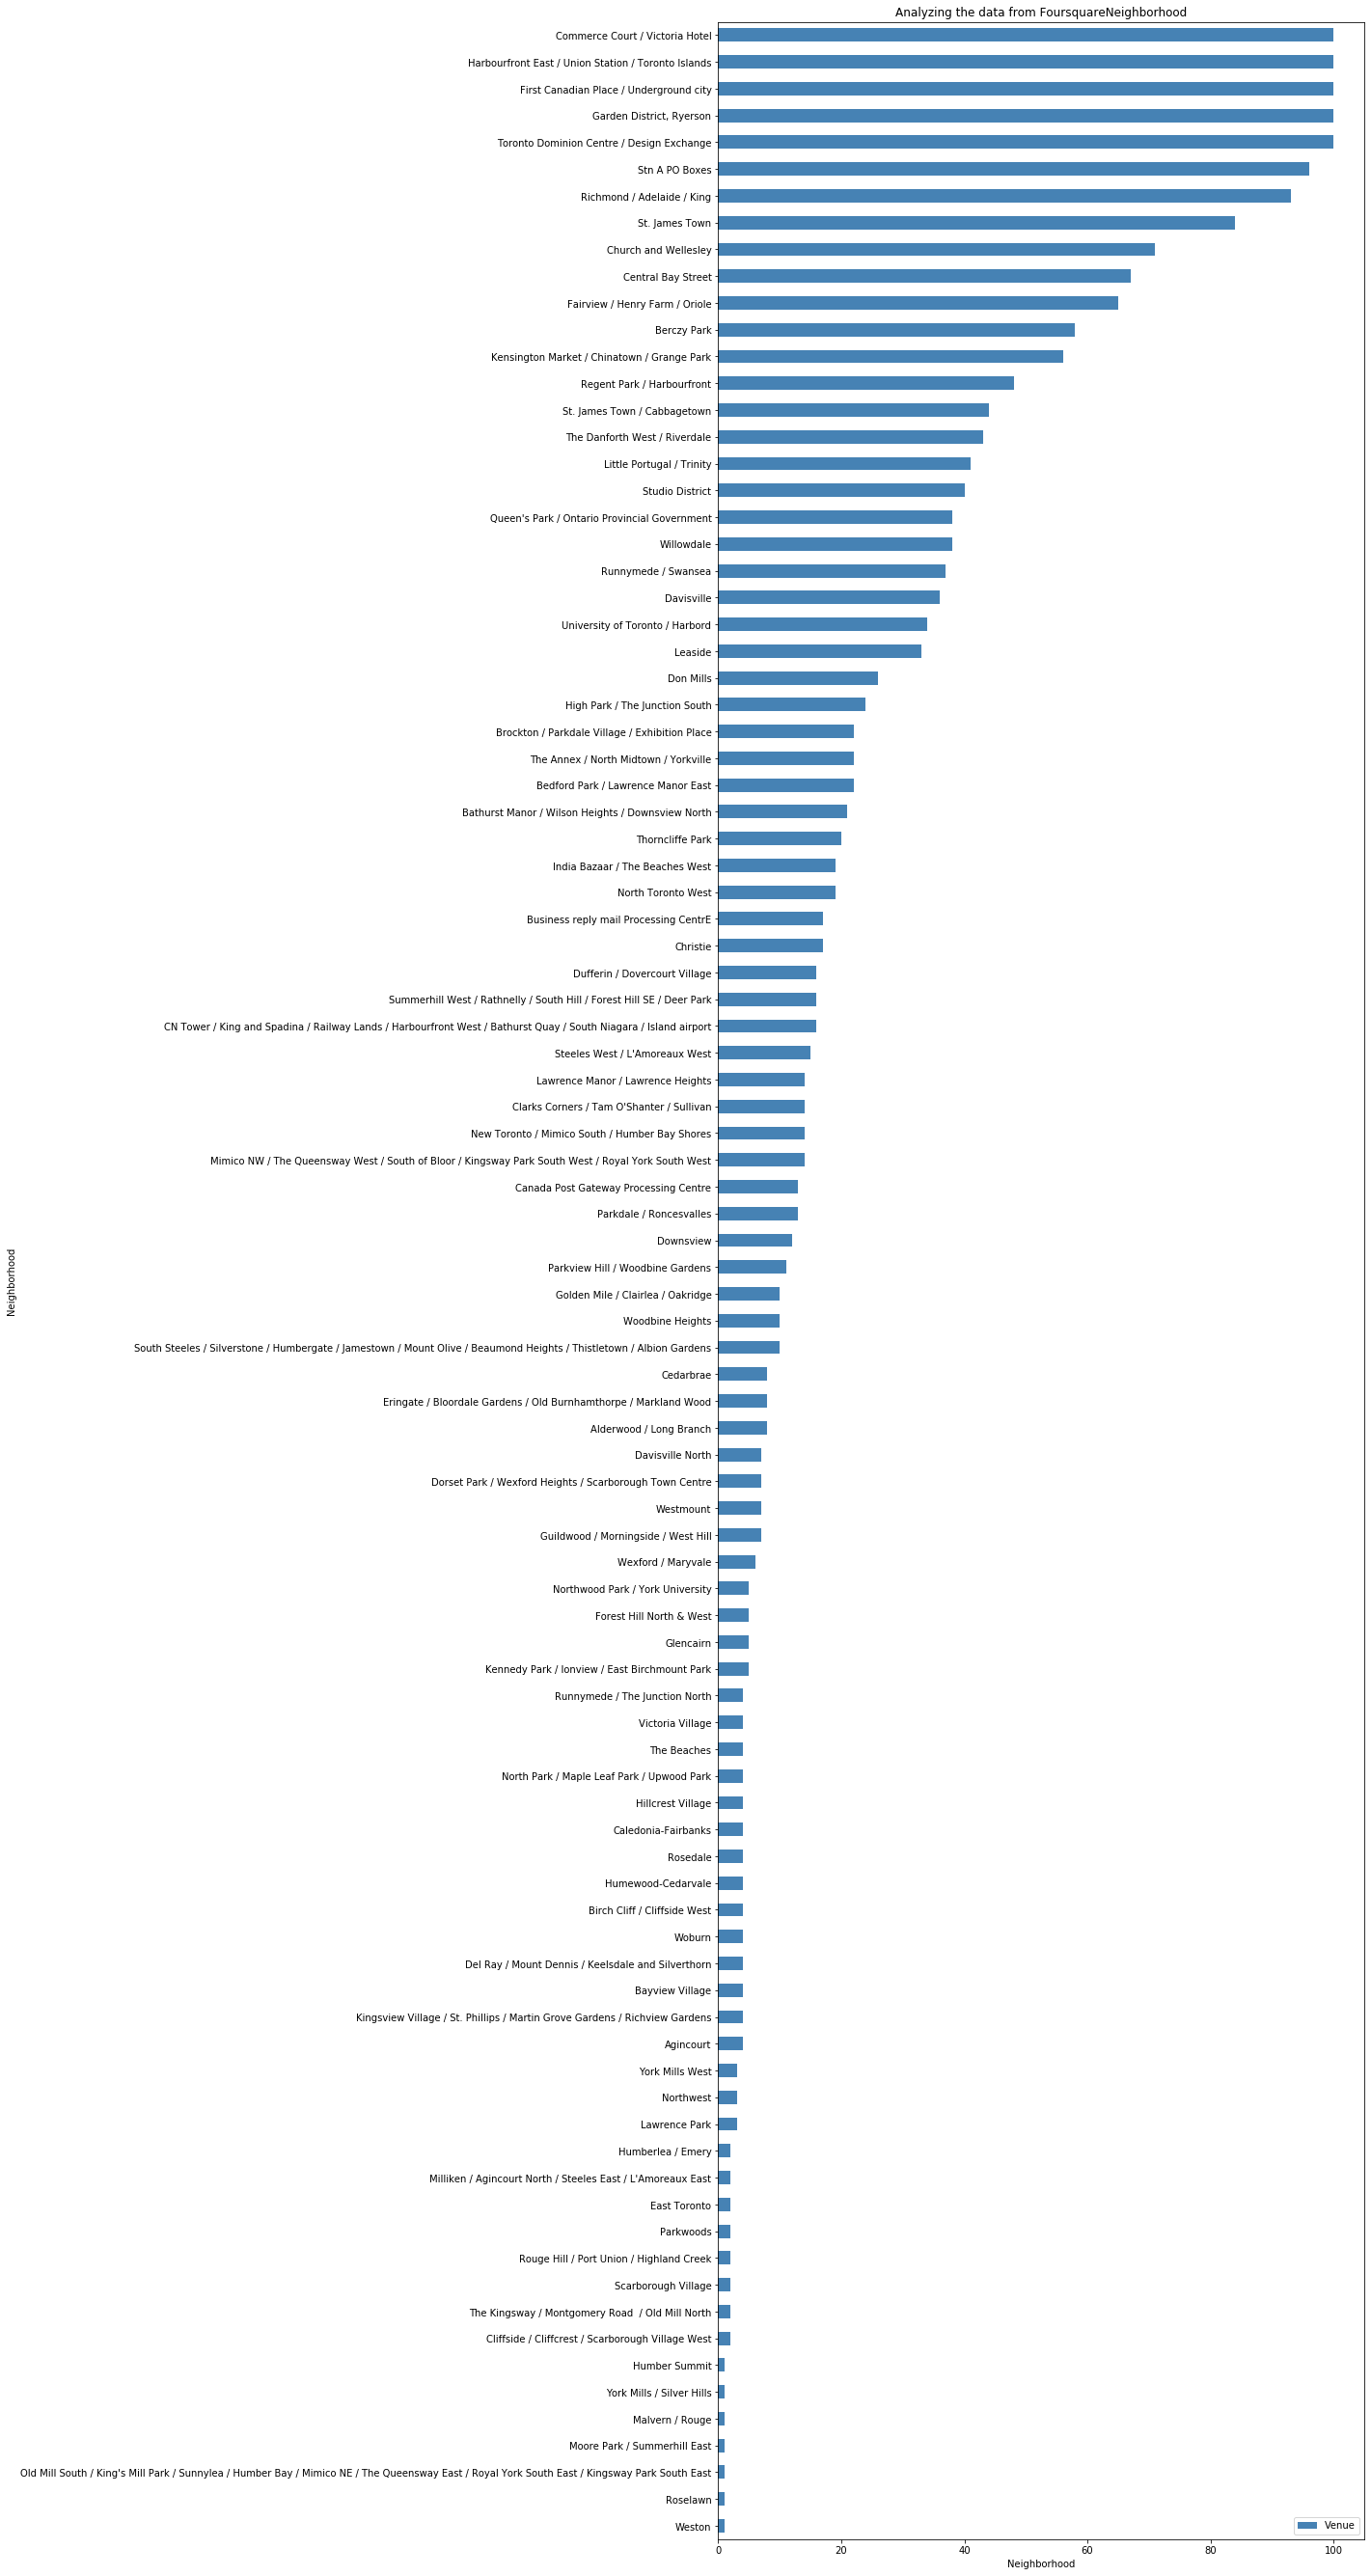

In [25]:
venuesBarh=venues.groupby('Neighborhood').count()
venuesBarh=venuesBarh.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1)
venuesBarh=venuesBarh.astype({'Venue': 'int64'})
venuesBarh=venuesBarh.sort_values(by=['Venue'])
venuesBarh.plot(kind='barh', figsize=(12, 48), color='steelblue')
plt.xlabel('Neighborhood')
plt.title('Analyzing the data from FoursquareNeighborhood')
plt.show()

In [26]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 267 uniques categories.


In [27]:

# one hot encoding
canada_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
canada_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [canada_onehot.columns[-1]] + list(canada_onehot.columns[:-1])
canada_onehot = canada_onehot[fixed_columns]
canada_grouped = canada_onehot.groupby('Neighborhood').mean().reset_index()
canada_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.00000

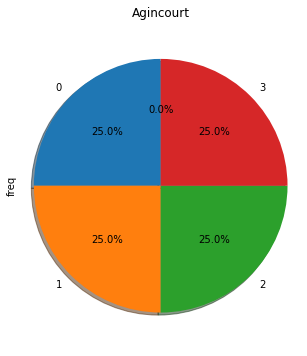

                       venue  freq
0                     Lounge  0.25
1  Latin American Restaurant  0.25
2             Breakfast Spot  0.25
3         Chinese Restaurant  0.25
4              Metro Station  0.00




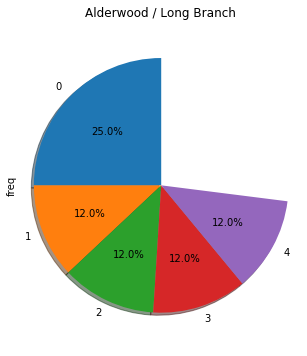

          venue  freq
0   Pizza Place  0.25
1           Gym  0.12
2  Skating Rink  0.12
3   Coffee Shop  0.12
4           Pub  0.12




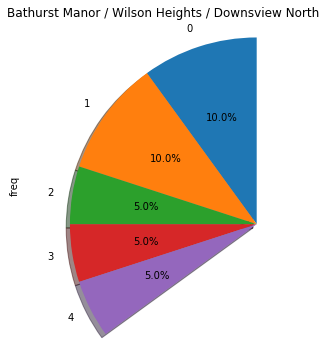

              venue  freq
0              Bank  0.10
1       Coffee Shop  0.10
2          Pharmacy  0.05
3       Supermarket  0.05
4  Sushi Restaurant  0.05




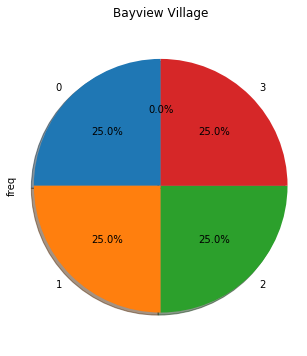

                 venue  freq
0                 Café  0.25
1                 Bank  0.25
2   Chinese Restaurant  0.25
3  Japanese Restaurant  0.25
4          Yoga Studio  0.00




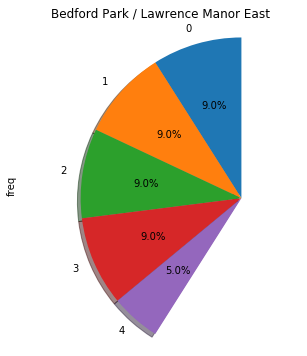

                venue  freq
0         Coffee Shop  0.09
1          Restaurant  0.09
2      Sandwich Place  0.09
3  Italian Restaurant  0.09
4         Pizza Place  0.05




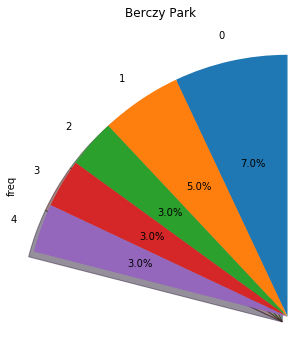

                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2            Beer Bar  0.03
3  Seafood Restaurant  0.03
4              Bakery  0.03




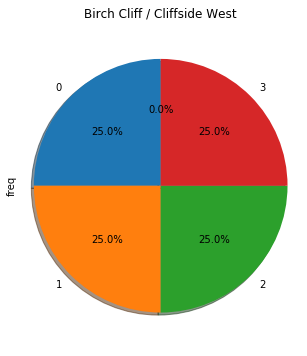

                   venue  freq
0        College Stadium  0.25
1           Skating Rink  0.25
2  General Entertainment  0.25
3                   Café  0.25
4      Martial Arts Dojo  0.00




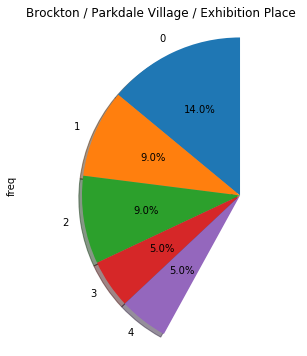

            venue  freq
0            Café  0.14
1     Coffee Shop  0.09
2  Breakfast Spot  0.09
3             Gym  0.05
4    Intersection  0.05




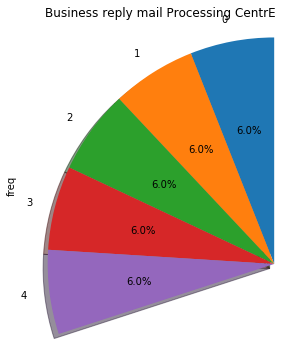

                venue  freq
0         Yoga Studio  0.06
1       Auto Workshop  0.06
2       Garden Center  0.06
3              Garden  0.06
4  Light Rail Station  0.06




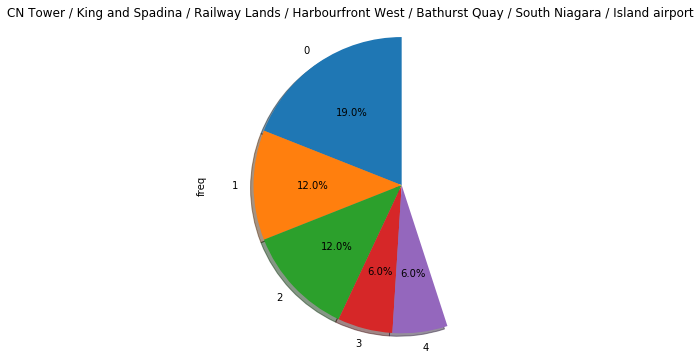

              venue  freq
0   Airport Service  0.19
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3   Harbor / Marina  0.06
4     Boat or Ferry  0.06




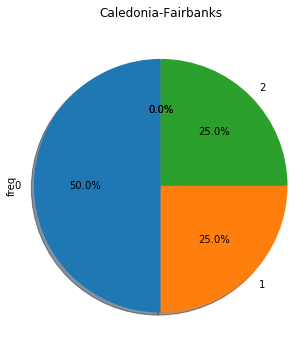

             venue  freq
0             Park  0.50
1             Pool  0.25
2    Women's Store  0.25
3  Harbor / Marina  0.00
4   Hardware Store  0.00




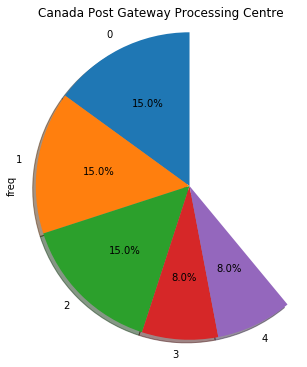

                      venue  freq
0               Coffee Shop  0.15
1                     Hotel  0.15
2              Intersection  0.15
3  Mediterranean Restaurant  0.08
4       American Restaurant  0.08




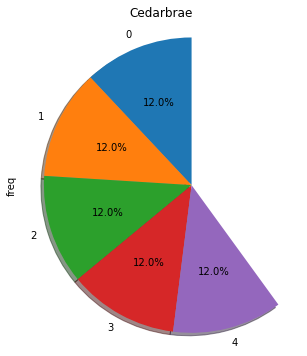

                  venue  freq
0      Hakka Restaurant  0.12
1                  Bank  0.12
2  Caribbean Restaurant  0.12
3       Thai Restaurant  0.12
4           Gas Station  0.12




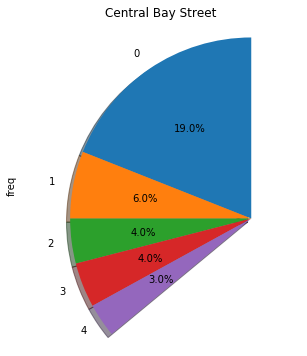

                 venue  freq
0          Coffee Shop  0.19
1   Italian Restaurant  0.06
2                 Café  0.04
3       Sandwich Place  0.04
4  Japanese Restaurant  0.03




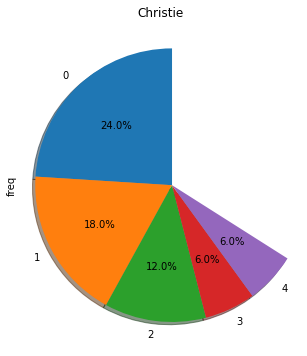

                venue  freq
0       Grocery Store  0.24
1                Café  0.18
2                Park  0.12
3         Coffee Shop  0.06
4  Italian Restaurant  0.06




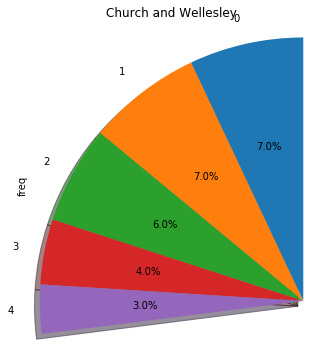

                 venue  freq
0          Coffee Shop  0.07
1     Sushi Restaurant  0.07
2  Japanese Restaurant  0.06
3           Restaurant  0.04
4          Yoga Studio  0.03




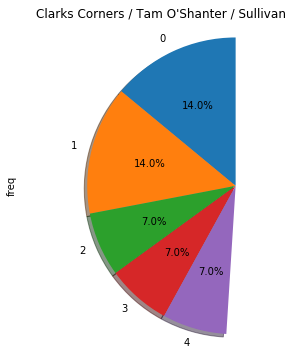

                 venue  freq
0             Pharmacy  0.14
1          Pizza Place  0.14
2  Fried Chicken Joint  0.07
3                 Bank  0.07
4   Italian Restaurant  0.07




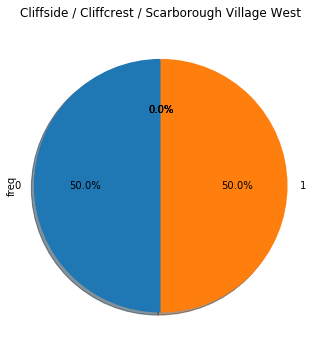

                 venue  freq
0                Motel   0.5
1  American Restaurant   0.5
2          Yoga Studio   0.0
3          Men's Store   0.0
4    Mobile Phone Shop   0.0




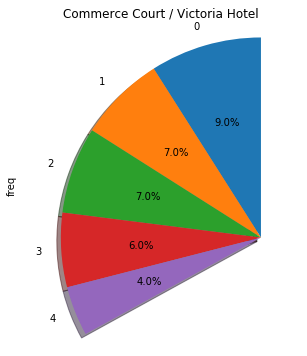

         venue  freq
0  Coffee Shop  0.09
1         Café  0.07
2   Restaurant  0.07
3        Hotel  0.06
4          Gym  0.04




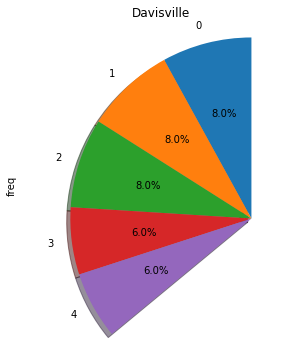

            venue  freq
0    Dessert Shop  0.08
1  Sandwich Place  0.08
2     Pizza Place  0.08
3             Gym  0.06
4            Café  0.06




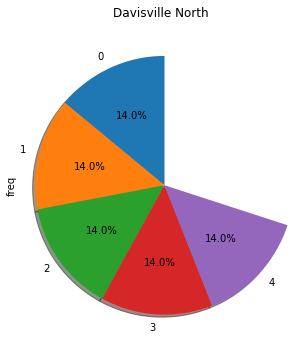

              venue  freq
0               Gym  0.14
1             Hotel  0.14
2  Department Store  0.14
3    Sandwich Place  0.14
4    Breakfast Spot  0.14




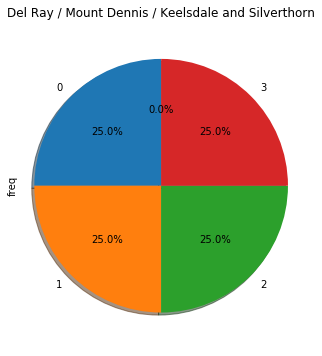

                  venue  freq
0  Fast Food Restaurant  0.25
1            Restaurant  0.25
2        Sandwich Place  0.25
3           Coffee Shop  0.25
4           Men's Store  0.00




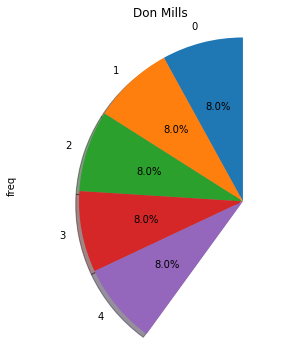

                 venue  freq
0                  Gym  0.08
1          Coffee Shop  0.08
2           Beer Store  0.08
3  Japanese Restaurant  0.08
4     Asian Restaurant  0.08




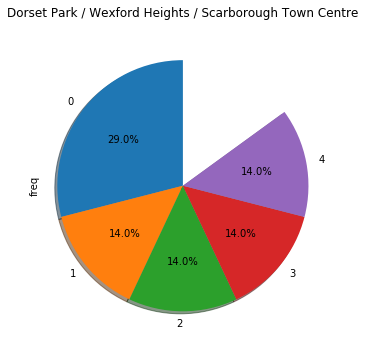

                   venue  freq
0      Indian Restaurant  0.29
1              Pet Store  0.14
2  Vietnamese Restaurant  0.14
3                Brewery  0.14
4     Chinese Restaurant  0.14




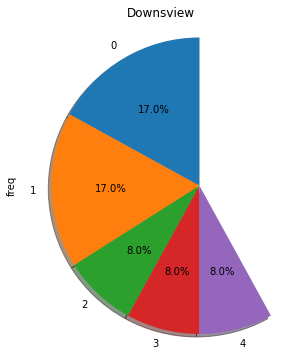

               venue  freq
0               Park  0.17
1      Grocery Store  0.17
2               Bank  0.08
3  Korean Restaurant  0.08
4         Food Truck  0.08




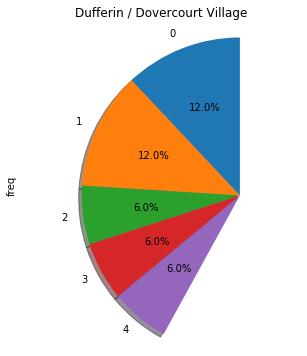

         venue  freq
0       Bakery  0.12
1     Pharmacy  0.12
2  Music Venue  0.06
3         Park  0.06
4         Café  0.06




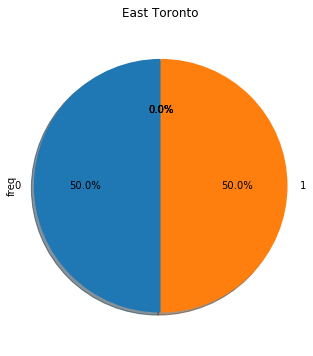

                      venue  freq
0                      Park   0.5
1         Convenience Store   0.5
2  Mediterranean Restaurant   0.0
3         Mobile Phone Shop   0.0
4        Miscellaneous Shop   0.0




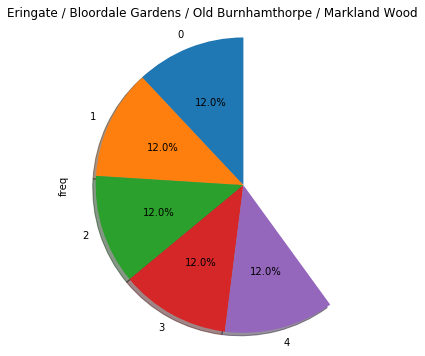

            venue  freq
0     Pizza Place  0.12
1  Cosmetics Shop  0.12
2      Beer Store  0.12
3     Coffee Shop  0.12
4            Café  0.12




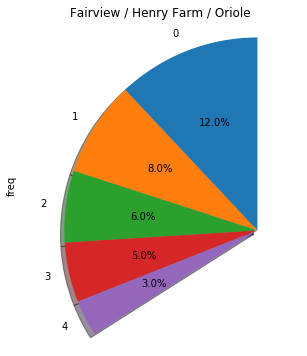

                  venue  freq
0        Clothing Store  0.12
1           Coffee Shop  0.08
2  Fast Food Restaurant  0.06
3            Restaurant  0.05
4   Japanese Restaurant  0.03




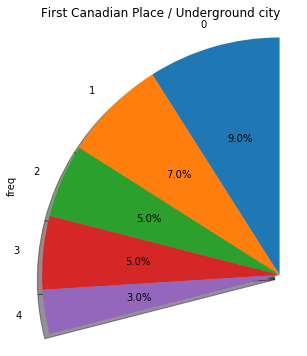

              venue  freq
0       Coffee Shop  0.09
1              Café  0.07
2             Hotel  0.05
3        Restaurant  0.05
4  Asian Restaurant  0.03




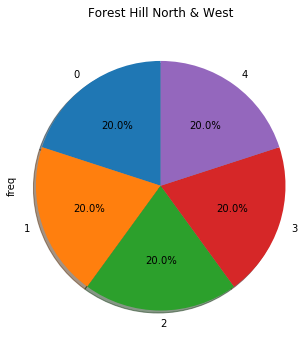

              venue  freq
0             Trail   0.2
1              Park   0.2
2  Sushi Restaurant   0.2
3     Jewelry Store   0.2
4      Home Service   0.2




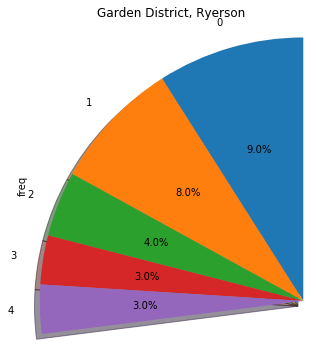

                 venue  freq
0       Clothing Store  0.09
1          Coffee Shop  0.08
2                 Café  0.04
3       Cosmetics Shop  0.03
4  Japanese Restaurant  0.03




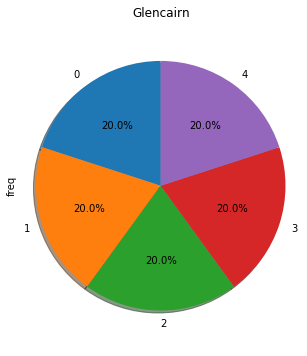

                 venue  freq
0                 Park   0.2
1  Japanese Restaurant   0.2
2          Pizza Place   0.2
3        Metro Station   0.2
4                  Pub   0.2




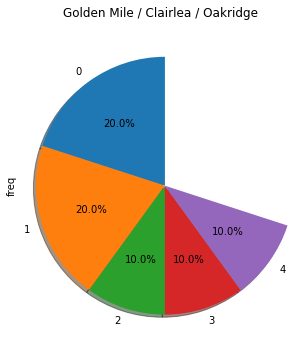

            venue  freq
0          Bakery   0.2
1        Bus Line   0.2
2    Intersection   0.1
3  Ice Cream Shop   0.1
4     Bus Station   0.1




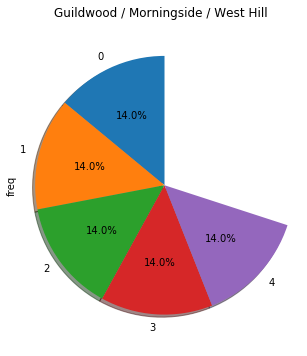

                venue  freq
0  Mexican Restaurant  0.14
1        Intersection  0.14
2                Bank  0.14
3      Breakfast Spot  0.14
4      Medical Center  0.14




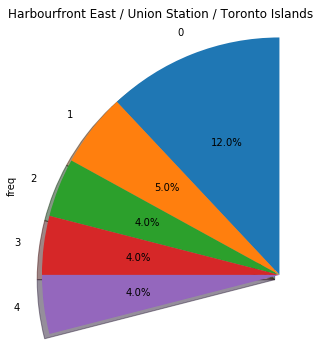

                venue  freq
0         Coffee Shop  0.12
1            Aquarium  0.05
2          Restaurant  0.04
3               Hotel  0.04
4  Italian Restaurant  0.04




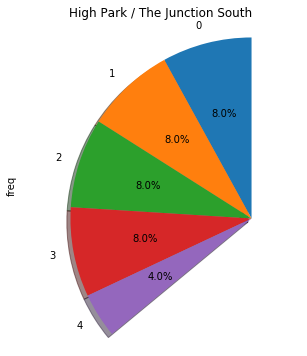

                venue  freq
0       Grocery Store  0.08
1  Mexican Restaurant  0.08
2     Thai Restaurant  0.08
3                Café  0.08
4           Bookstore  0.04




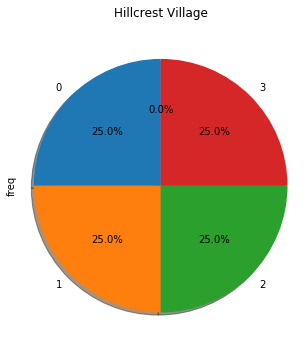

                      venue  freq
0                      Pool  0.25
1  Mediterranean Restaurant  0.25
2                   Dog Run  0.25
3               Golf Course  0.25
4        Miscellaneous Shop  0.00




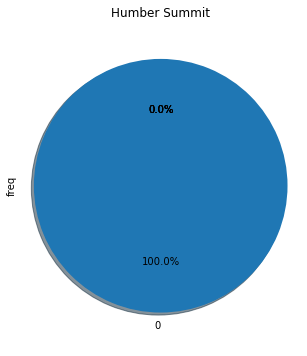

                        venue  freq
0         Empanada Restaurant   1.0
1                 Yoga Studio   0.0
2  Modern European Restaurant   0.0
3                      Lounge   0.0
4               Luggage Store   0.0




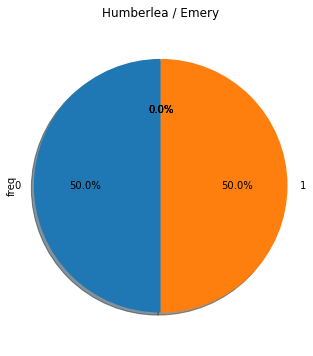

                       venue  freq
0               Food Service   0.5
1             Baseball Field   0.5
2                Yoga Studio   0.0
3         Miscellaneous Shop   0.0
4  Middle Eastern Restaurant   0.0




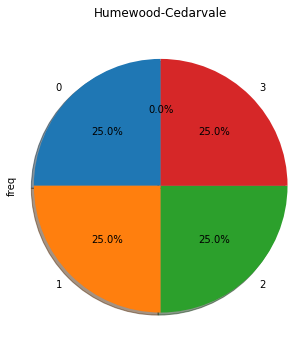

          venue  freq
0  Tennis Court  0.25
1  Hockey Arena  0.25
2         Trail  0.25
3         Field  0.25
4   Opera House  0.00




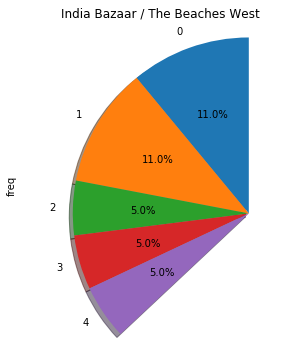

                  venue  freq
0           Pizza Place  0.11
1  Fast Food Restaurant  0.11
2                   Gym  0.05
3    Italian Restaurant  0.05
4                  Park  0.05




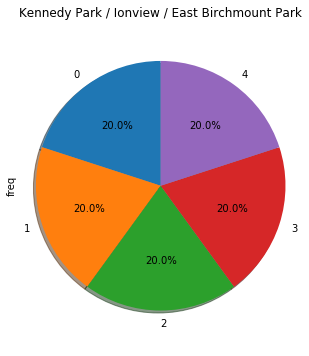

                venue  freq
0    Department Store   0.2
1  Chinese Restaurant   0.2
2         Coffee Shop   0.2
3      Discount Store   0.2
4       Train Station   0.2




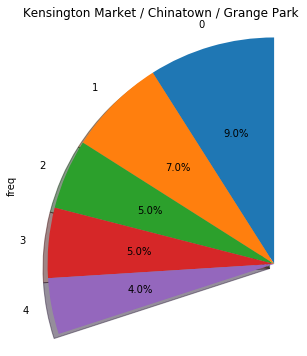

                   venue  freq
0                   Café  0.09
1            Coffee Shop  0.07
2  Vietnamese Restaurant  0.05
3     Mexican Restaurant  0.05
4            Gaming Cafe  0.04




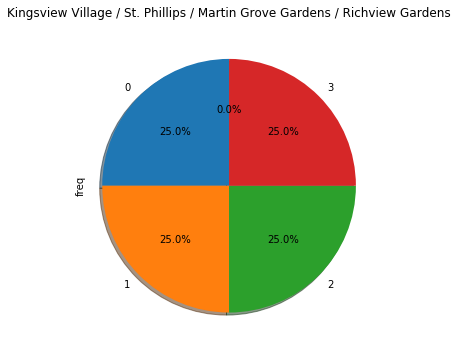

               venue  freq
0  Mobile Phone Shop  0.25
1        Pizza Place  0.25
2     Sandwich Place  0.25
3           Bus Line  0.25
4        Men's Store  0.00




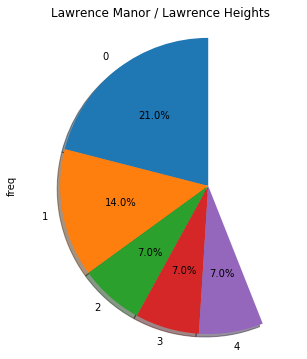

                    venue  freq
0          Clothing Store  0.21
1  Furniture / Home Store  0.14
2                Boutique  0.07
3       Accessories Store  0.07
4      Miscellaneous Shop  0.07




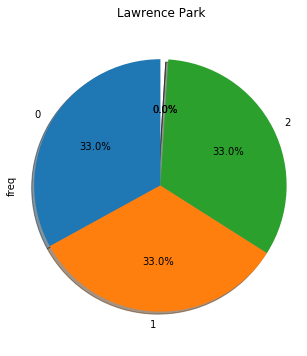

                venue  freq
0                Park  0.33
1            Bus Line  0.33
2         Swim School  0.33
3         Men's Store  0.00
4  Miscellaneous Shop  0.00




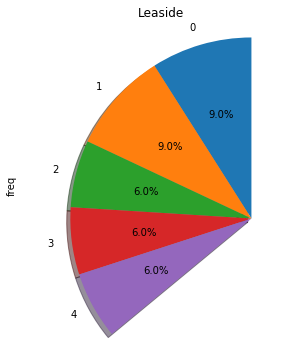

                    venue  freq
0             Coffee Shop  0.09
1     Sporting Goods Shop  0.09
2  Furniture / Home Store  0.06
3            Burger Joint  0.06
4                    Bank  0.06




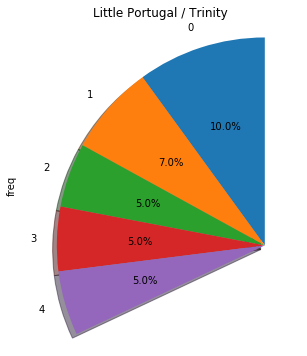

                   venue  freq
0                    Bar  0.10
1             Restaurant  0.07
2                   Café  0.05
3            Men's Store  0.05
4  Vietnamese Restaurant  0.05




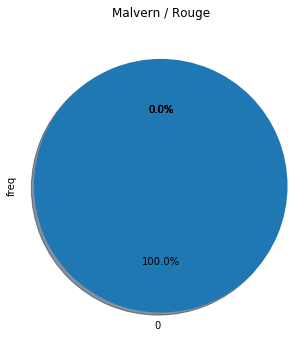

                        venue  freq
0        Fast Food Restaurant   1.0
1  Modern European Restaurant   0.0
2                Liquor Store   0.0
3                      Lounge   0.0
4               Luggage Store   0.0




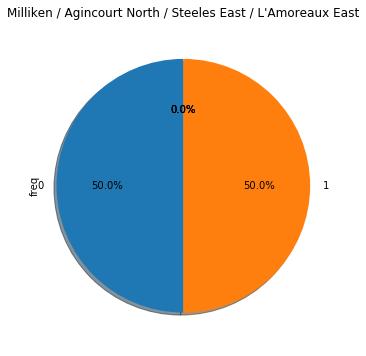

                      venue  freq
0                      Park   0.5
1                Playground   0.5
2  Mediterranean Restaurant   0.0
3         Mobile Phone Shop   0.0
4        Miscellaneous Shop   0.0




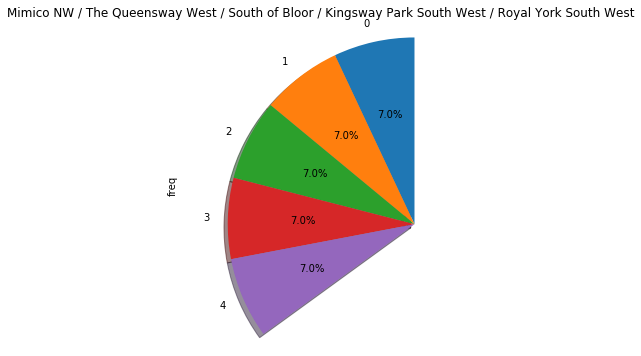

                    venue  freq
0                     Gym  0.07
1  Thrift / Vintage Store  0.07
2          Hardware Store  0.07
3          Discount Store  0.07
4          Sandwich Place  0.07




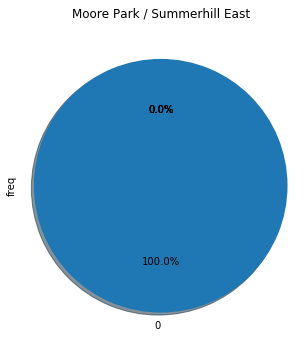

                      venue  freq
0                Playground   1.0
1               Yoga Studio   0.0
2  Mediterranean Restaurant   0.0
3         Mobile Phone Shop   0.0
4        Miscellaneous Shop   0.0




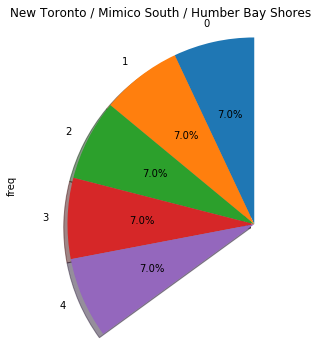

                 venue  freq
0                  Gym  0.07
1               Bakery  0.07
2           Hobby Shop  0.07
3  Fried Chicken Joint  0.07
4          Flower Shop  0.07




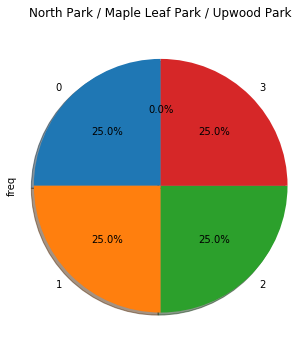

                        venue  freq
0                      Bakery  0.25
1                        Park  0.25
2  Construction & Landscaping  0.25
3            Basketball Court  0.25
4                 Men's Store  0.00




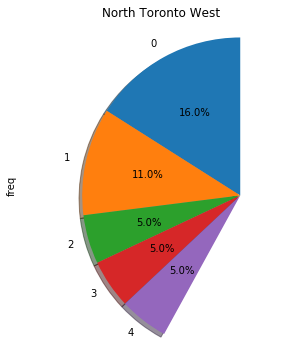

                 venue  freq
0       Clothing Store  0.16
1          Coffee Shop  0.11
2          Yoga Studio  0.05
3  Sporting Goods Shop  0.05
4         Dessert Shop  0.05




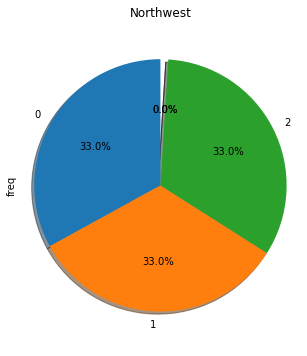

                 venue  freq
0            Drugstore  0.33
1  Rental Car Location  0.33
2                  Bar  0.33
3          Yoga Studio  0.00
4   Miscellaneous Shop  0.00




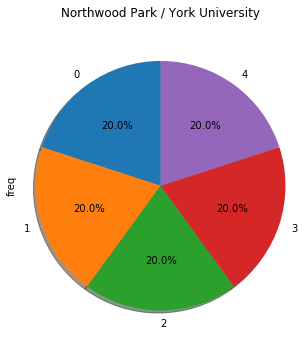

                  venue  freq
0  Caribbean Restaurant   0.2
1        Massage Studio   0.2
2                   Bar   0.2
3           Coffee Shop   0.2
4    Miscellaneous Shop   0.2




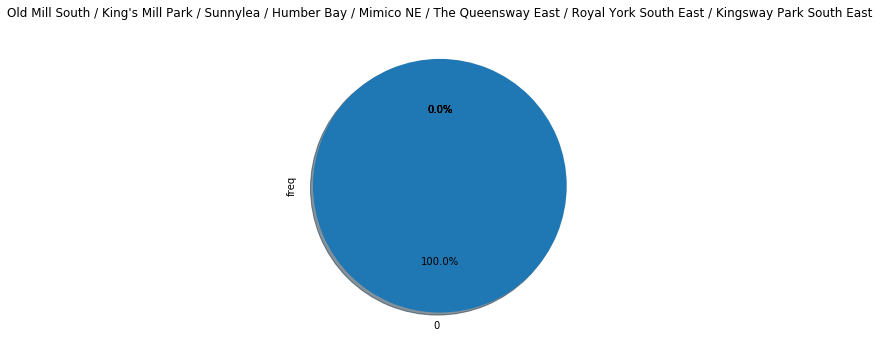

                venue  freq
0      Baseball Field   1.0
1         Yoga Studio   0.0
2         Men's Store   0.0
3   Mobile Phone Shop   0.0
4  Miscellaneous Shop   0.0




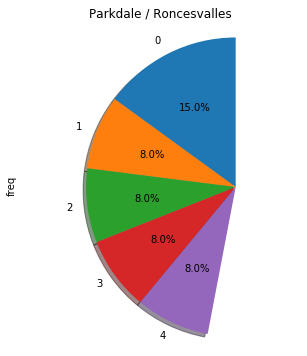

                venue  freq
0           Gift Shop  0.15
1           Bookstore  0.08
2             Dog Run  0.08
3  Italian Restaurant  0.08
4          Restaurant  0.08




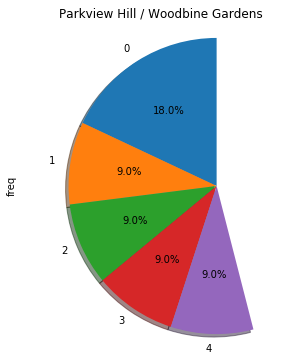

                  venue  freq
0           Pizza Place  0.18
1              Pharmacy  0.09
2    Athletics & Sports  0.09
3              Bus Line  0.09
4  Fast Food Restaurant  0.09




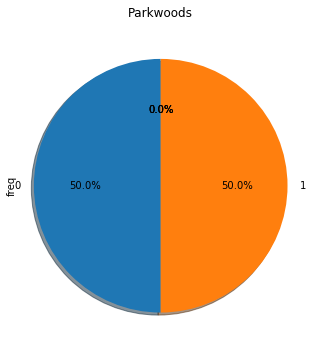

                        venue  freq
0                        Park   0.5
1           Food & Drink Shop   0.5
2  Modern European Restaurant   0.0
3                      Lounge   0.0
4               Luggage Store   0.0




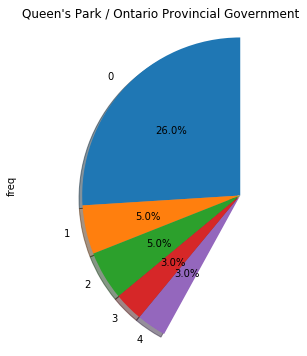

                 venue  freq
0          Coffee Shop  0.26
1     Sushi Restaurant  0.05
2                Diner  0.05
3          Yoga Studio  0.03
4  Fried Chicken Joint  0.03




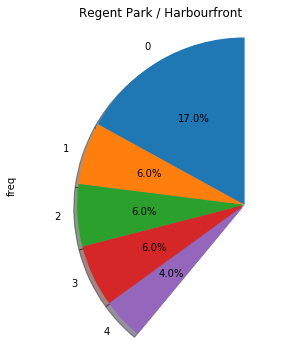

         venue  freq
0  Coffee Shop  0.17
1         Park  0.06
2          Pub  0.06
3       Bakery  0.06
4         Café  0.04




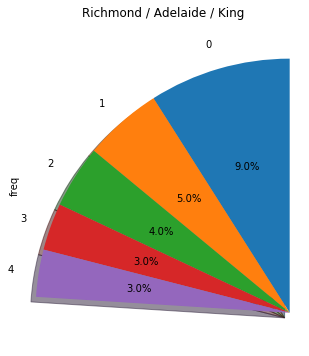

                 venue  freq
0          Coffee Shop  0.09
1                 Café  0.05
2           Restaurant  0.04
3                  Gym  0.03
4  American Restaurant  0.03




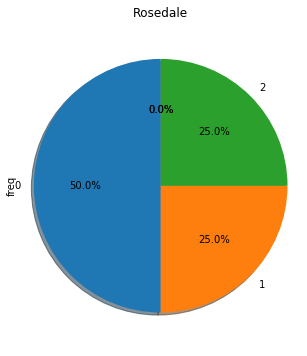

                      venue  freq
0                      Park  0.50
1                Playground  0.25
2                     Trail  0.25
3  Mediterranean Restaurant  0.00
4        Miscellaneous Shop  0.00




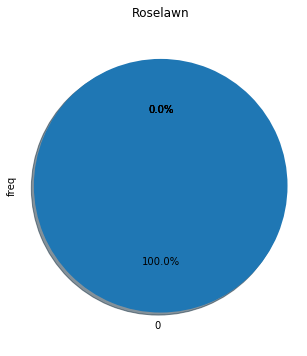

                venue  freq
0              Garden   1.0
1         Yoga Studio   0.0
2         Men's Store   0.0
3   Mobile Phone Shop   0.0
4  Miscellaneous Shop   0.0




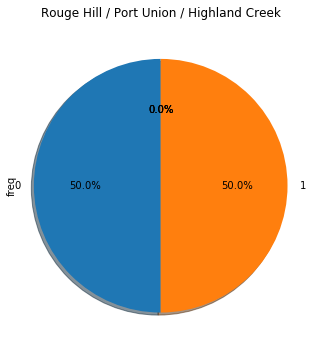

                      venue  freq
0                       Bar   0.5
1               Golf Course   0.5
2               Yoga Studio   0.0
3  Mediterranean Restaurant   0.0
4        Miscellaneous Shop   0.0




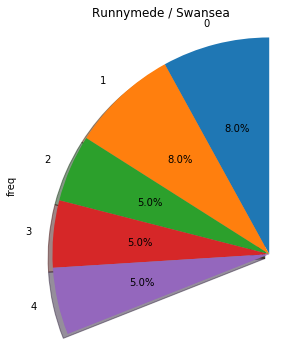

              venue  freq
0              Café  0.08
1       Pizza Place  0.08
2       Coffee Shop  0.05
3  Sushi Restaurant  0.05
4               Pub  0.05




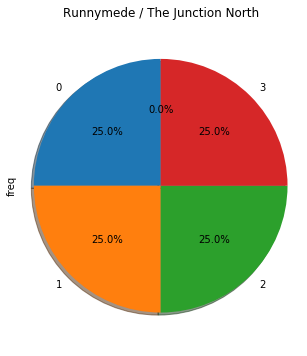

               venue  freq
0        Pizza Place  0.25
1  Convenience Store  0.25
2           Bus Line  0.25
3     Breakfast Spot  0.25
4        Yoga Studio  0.00




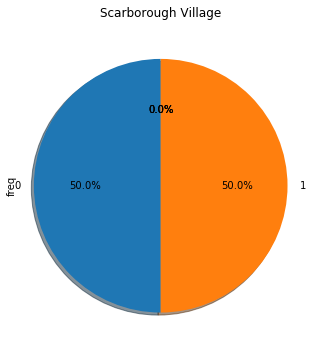

                      venue  freq
0   Health & Beauty Service   0.5
1                Playground   0.5
2               Yoga Studio   0.0
3  Mediterranean Restaurant   0.0
4         Mobile Phone Shop   0.0




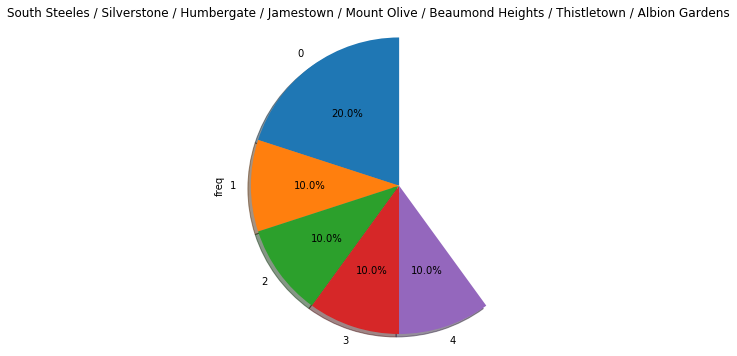

           venue  freq
0  Grocery Store   0.2
1       Pharmacy   0.1
2    Coffee Shop   0.1
3   Liquor Store   0.1
4     Beer Store   0.1




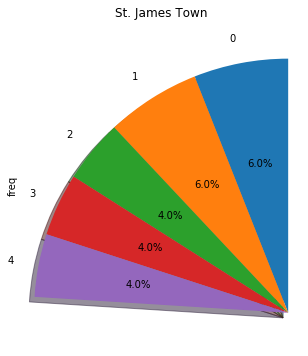

                venue  freq
0                Café  0.06
1         Coffee Shop  0.06
2               Hotel  0.04
3  Italian Restaurant  0.04
4           Gastropub  0.04




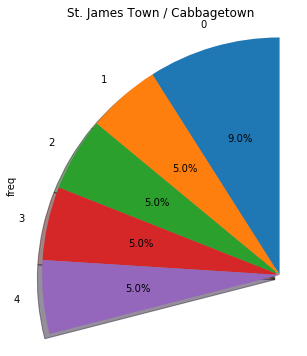

                venue  freq
0         Coffee Shop  0.09
1              Market  0.05
2              Bakery  0.05
3  Chinese Restaurant  0.05
4          Restaurant  0.05




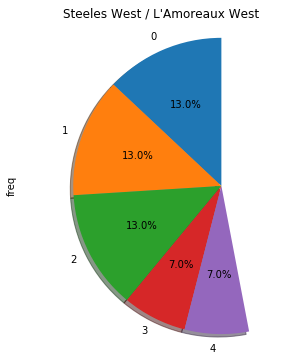

                    venue  freq
0    Fast Food Restaurant  0.13
1             Coffee Shop  0.13
2      Chinese Restaurant  0.13
3                     Gym  0.07
4  Thrift / Vintage Store  0.07




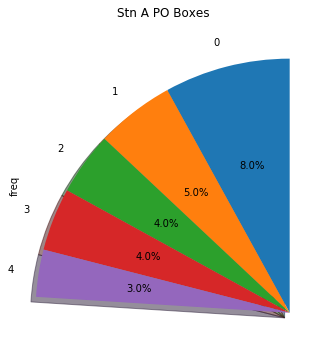

                venue  freq
0         Coffee Shop  0.08
1  Italian Restaurant  0.05
2                Café  0.04
3  Seafood Restaurant  0.04
4               Hotel  0.03




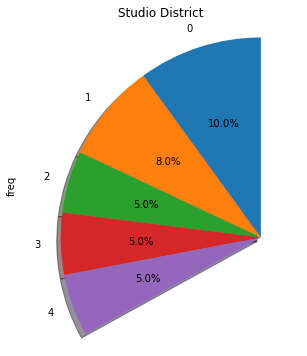

         venue  freq
0         Café  0.10
1  Coffee Shop  0.08
2      Brewery  0.05
3       Bakery  0.05
4    Gastropub  0.05




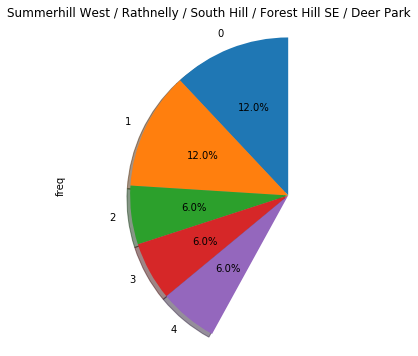

                venue  freq
0                 Pub  0.12
1         Coffee Shop  0.12
2        Liquor Store  0.06
3          Restaurant  0.06
4  Light Rail Station  0.06




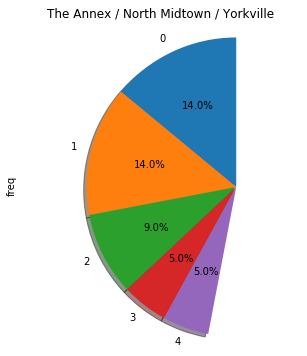

                           venue  freq
0                           Café  0.14
1                 Sandwich Place  0.14
2                    Coffee Shop  0.09
3                 Cosmetics Shop  0.05
4  Vegetarian / Vegan Restaurant  0.05




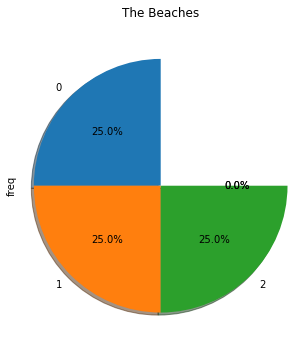

               venue  freq
0                Pub  0.25
1  Health Food Store  0.25
2              Trail  0.25
3        Yoga Studio  0.00
4        Men's Store  0.00




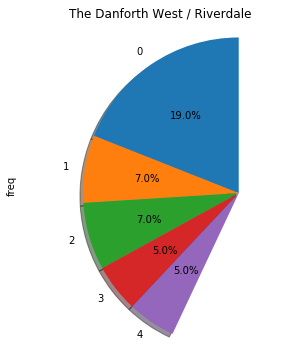

                    venue  freq
0        Greek Restaurant  0.19
1             Coffee Shop  0.07
2      Italian Restaurant  0.07
3          Ice Cream Shop  0.05
4  Furniture / Home Store  0.05




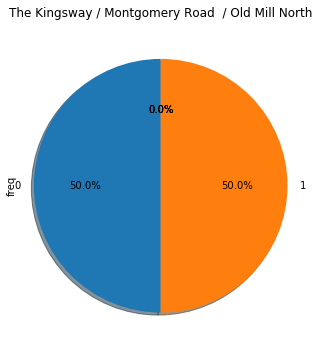

                        venue  freq
0                        Park   0.5
1                       River   0.5
2        Other Great Outdoors   0.0
3  Modern European Restaurant   0.0
4                      Lounge   0.0




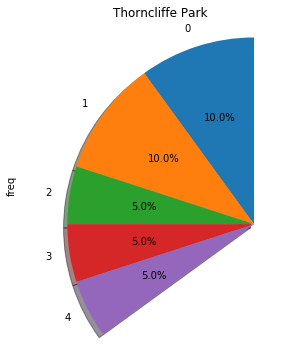

               venue  freq
0     Sandwich Place  0.10
1  Indian Restaurant  0.10
2        Yoga Studio  0.05
3       Liquor Store  0.05
4        Coffee Shop  0.05




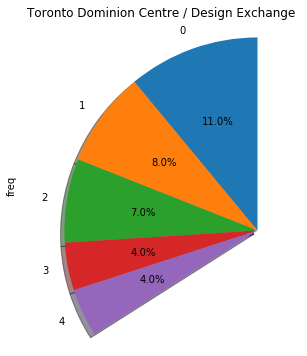

                 venue  freq
0          Coffee Shop  0.11
1                Hotel  0.08
2                 Café  0.07
3  Japanese Restaurant  0.04
4           Restaurant  0.04




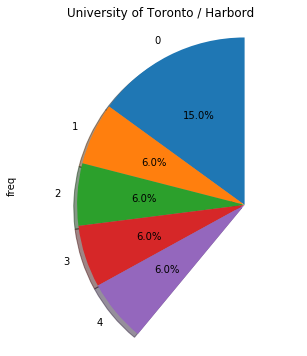

                 venue  freq
0                 Café  0.15
1               Bakery  0.06
2   Italian Restaurant  0.06
3  Japanese Restaurant  0.06
4                  Bar  0.06




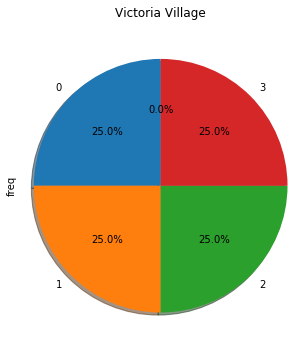

                   venue  freq
0           Hockey Arena  0.25
1      French Restaurant  0.25
2            Coffee Shop  0.25
3  Portuguese Restaurant  0.25
4            Men's Store  0.00




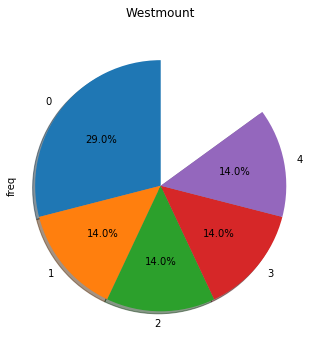

                venue  freq
0         Pizza Place  0.29
1        Intersection  0.14
2      Discount Store  0.14
3  Chinese Restaurant  0.14
4      Sandwich Place  0.14




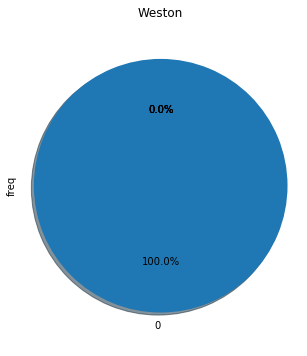

                      venue  freq
0         Convenience Store   1.0
1               Yoga Studio   0.0
2  Mediterranean Restaurant   0.0
3         Mobile Phone Shop   0.0
4        Miscellaneous Shop   0.0




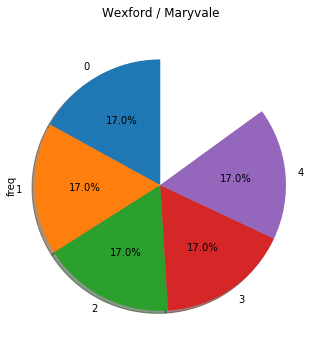

                       venue  freq
0                     Bakery  0.17
1             Breakfast Spot  0.17
2                Auto Garage  0.17
3             Sandwich Place  0.17
4  Middle Eastern Restaurant  0.17




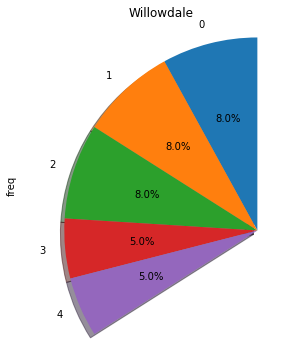

              venue  freq
0       Coffee Shop  0.08
1  Ramen Restaurant  0.08
2       Pizza Place  0.08
3              Café  0.05
4    Sandwich Place  0.05




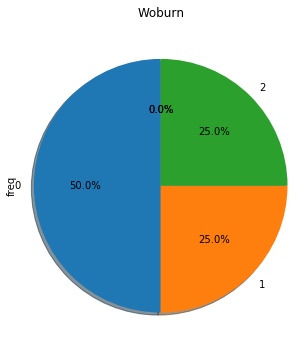

               venue  freq
0        Coffee Shop  0.50
1  Convenience Store  0.25
2  Korean Restaurant  0.25
3        Yoga Studio  0.00
4        Men's Store  0.00




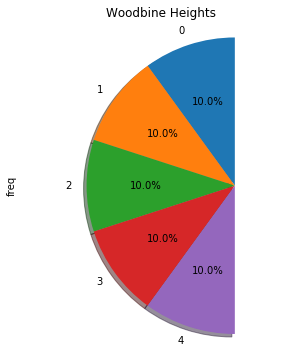

                venue  freq
0            Pharmacy   0.1
1         Video Store   0.1
2  Athletics & Sports   0.1
3    Asian Restaurant   0.1
4          Beer Store   0.1




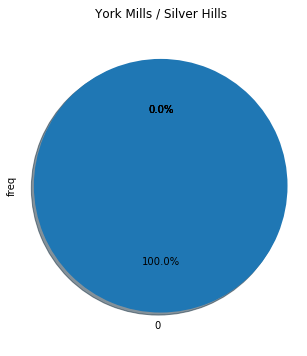

                             venue  freq
0                        Cafeteria   1.0
1                      Yoga Studio   0.0
2  Molecular Gastronomy Restaurant   0.0
3                    Luggage Store   0.0
4                           Market   0.0




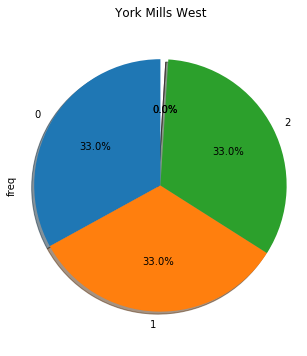

                      venue  freq
0                      Park  0.33
1                      Bank  0.33
2         Convenience Store  0.33
3  Mediterranean Restaurant  0.00
4        Miscellaneous Shop  0.00




In [28]:
num_top_venues = 5

for hood in canada_grouped['Neighborhood']:
   # print("----"+hood+"----")
    temp = canada_grouped[canada_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    temp=temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    temp['freq'].plot(kind='pie',figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
    plt.title(hood)
    plt.axis('equal') # Sets the pie chart to look like a circle.
    plt.show()
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


# Sorting Venus for analysis 

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = canada_grouped['Neighborhood']

for ind in np.arange(canada_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(canada_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Lounge,Breakfast Spot,Chinese Restaurant,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Dumpling Restaurant
1,Alderwood / Long Branch,Pizza Place,Sandwich Place,Skating Rink,Gym,Coffee Shop,Pub,Pharmacy,Women's Store,Dessert Shop,Dim Sum Restaurant
2,Bathurst Manor / Wilson Heights / Downsview North,Coffee Shop,Bank,Grocery Store,Fried Chicken Joint,Sandwich Place,Bridal Shop,Diner,Restaurant,Ice Cream Shop,Deli / Bodega
3,Bayview Village,Café,Bank,Chinese Restaurant,Japanese Restaurant,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
4,Bedford Park / Lawrence Manor East,Coffee Shop,Italian Restaurant,Restaurant,Sandwich Place,Sushi Restaurant,Greek Restaurant,Indian Restaurant,Juice Bar,Liquor Store,Comfort Food Restaurant
5,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Bakery,Italian Restaurant,Café,Cheese Shop,Restaurant,Seafood Restaurant,Beer Bar
6,Birch Cliff / Cliffside West,College Stadium,Café,Skating Rink,General Entertainment,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
7,Brockton / Parkdale Village / Exhibition Place,Café,Coffee Shop,Breakfast Spot,Restaurant,Bar,Bakery,Stadium,Intersection,Italian Restaurant,Climbing Gym
8,Business reply mail Processing CentrE,Yoga Studio,Pizza Place,Smoke Shop,Brewery,Spa,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant,Butcher
9,CN Tower / King and Spadina / Railway Lands / ...,Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Plane,Boutique,Airport,Airport Food Court,Sculpture Garden,Rental Car Location


In [31]:
# set number of clusters
kclusters = 10

canada_grouped_clustering = canada_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(canada_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

canada_merged = dfToronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
canada_merged = canada_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

 # check the last columns!

In [33]:
print(canada_merged.shape)
# simply drop whole row with "NaN" in "Cluster Labels" column
canada_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
print(canada_merged.shape)

(103, 17)
(99, 17)


In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(canada_merged['Latitude'], canada_merged['Longitude'], canada_merged['Neighborhood'], canada_merged['Cluster Labels']):
    cluster=int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
clusters=canada_merged['Cluster Labels'].unique()
clusters.sort()

In [36]:
for cluster in clusters:
    dfClusters=canada_merged.loc[canada_merged['Cluster Labels'] == cluster, canada_merged.columns[[1] + list(range(5, canada_merged.shape[1]))]]
    print('Cluster number:',cluster,' \n')
    display(dfClusters)
    print('\n')

Cluster number: 0.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
81,York,-79.487262,0.0,Bus Line,Pizza Place,Breakfast Spot,Convenience Store,Women's Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run
100,Etobicoke,-79.554724,0.0,Mobile Phone Shop,Bus Line,Pizza Place,Sandwich Place,Women's Store,Distribution Center,Dim Sum Restaurant,Diner,Discount Store,Dog Run




Cluster number: 1.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,-79.160497,1.0,Golf Course,Bar,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
2,Scarborough,-79.188711,1.0,Rental Car Location,Intersection,Bank,Medical Center,Mexican Restaurant,Breakfast Spot,Electronics Store,Dumpling Restaurant,Drugstore,Donut Shop
3,Scarborough,-79.216917,1.0,Coffee Shop,Korean Restaurant,Convenience Store,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,Scarborough,-79.239476,1.0,Gas Station,Bakery,Fried Chicken Joint,Caribbean Restaurant,Athletics & Sports,Thai Restaurant,Bank,Hakka Restaurant,Dumpling Restaurant,Drugstore
6,Scarborough,-79.262029,1.0,Train Station,Discount Store,Coffee Shop,Chinese Restaurant,Department Store,Doner Restaurant,Dim Sum Restaurant,Diner,Distribution Center,Dog Run
7,Scarborough,-79.284577,1.0,Bus Line,Bakery,Park,Ice Cream Shop,Intersection,Bus Station,Metro Station,Soccer Field,Concert Hall,Empanada Restaurant
9,Scarborough,-79.264848,1.0,College Stadium,Café,Skating Rink,General Entertainment,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
10,Scarborough,-79.273304,1.0,Indian Restaurant,Pet Store,Vietnamese Restaurant,Brewery,Furniture / Home Store,Chinese Restaurant,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
11,Scarborough,-79.295849,1.0,Middle Eastern Restaurant,Breakfast Spot,Auto Garage,Bakery,Sandwich Place,Shopping Mall,Dumpling Restaurant,Drugstore,Donut Shop,Dessert Shop
12,Scarborough,-79.262029,1.0,Latin American Restaurant,Lounge,Breakfast Spot,Chinese Restaurant,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Dumpling Restaurant




Cluster number: 2.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
96,North York,-79.565963,2.0,Empanada Restaurant,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop




Cluster number: 3.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,-79.239476,3.0,Playground,Health & Beauty Service,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
48,Central Toronto,-79.383160,3.0,Playground,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop




Cluster number: 4.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Central Toronto,-79.416936,4.0,Garden,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Department Store




Cluster number: 5.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
98,York,-79.518188,5.0,Convenience Store,Women's Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant




Cluster number: 6.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Scarborough,-79.284577,6.0,Park,Playground,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
23,North York,-79.400049,6.0,Park,Bank,Convenience Store,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dessert Shop,Donut Shop
25,North York,-79.329656,6.0,Park,Food & Drink Shop,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Event Space
40,East York,-79.338106,6.0,Convenience Store,Park,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dessert Shop,Donut Shop
44,Central Toronto,-79.388790,6.0,Park,Bus Line,Swim School,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant,Event Space
50,Downtown Toronto,-79.377529,6.0,Park,Trail,Playground,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
74,York,-79.453512,6.0,Park,Pool,Women's Store,Airport,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
90,Etobicoke,-79.506944,6.0,Park,River,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run




Cluster number: 7.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,Etobicoke,-79.498509,7.0,Baseball Field,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore,Farmers Market
97,North York,-79.532242,7.0,Food Service,Baseball Field,Women's Store,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Falafel Restaurant




Cluster number: 8.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,-79.194353,8.0,Fast Food Restaurant,Dessert Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop




Cluster number: 9.0  



,Borough,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Scarborough,-79.239476,9.0,Motel,American Restaurant,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
